In [2]:
import pandas as pd
import numpy as np

In [22]:
class1_sample = np.random.rand(20, 3)  # Example data for class 1
class2_sample = np.random.rand(20, 3)  # Example data for class 2

# Creating dataframes
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Concatenate the dataframes
df = pd.concat([df, df1], ignore_index=True)

# Sample 40 rows
df = df.sample(40)


In [5]:
df.head()

,feature1,feature2,feature3,target
15,0.480687,0.990791,0.493248,1
19,0.600297,0.694541,0.045171,1
8,0.205933,0.757715,0.617241,1
24,0.348092,0.783186,0.651011,0
33,0.638415,0.602134,0.084898,0


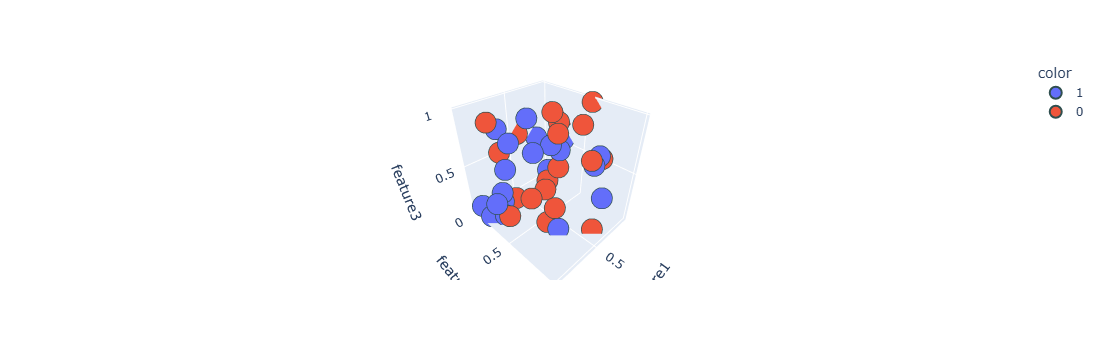

In [7]:
#visualising the data
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [8]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [9]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.02564103 -0.16506382 -0.25467724]
 [-0.16506382  1.02564103  0.13353848]
 [-0.25467724  0.13353848  1.02564103]]


In [10]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

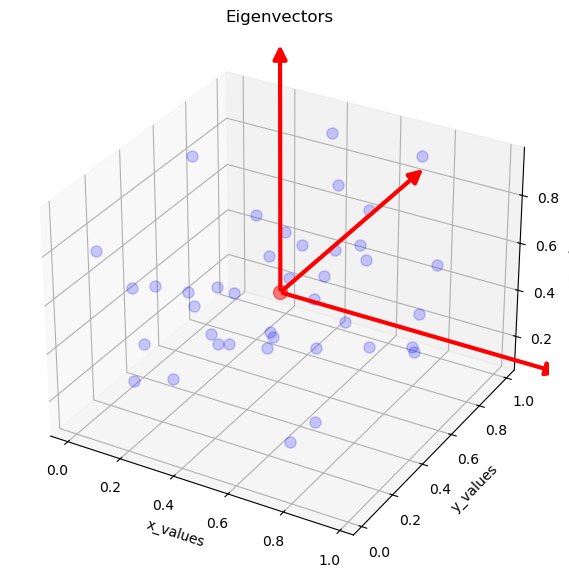

In [17]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
import numpy as np
import pandas as pd

# Define the Arrow3D class with the required do_3d_projection method
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        # Project 3D coordinates to 2D coordinates for display
        xs, ys, zs = proj_transform(*self._verts3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return zs[0]  # Return z-ordering for sorting artists

    def draw(self, renderer):
        FancyArrowPatch.draw(self, renderer)

# Ensure `df` and `eigen_vectors` are defined
np.random.seed(0)
df = pd.DataFrame(np.random.rand(40, 3), columns=['feature1', 'feature2', 'feature3'])
eigen_vectors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Example eigenvectors

# Set up the figure and 3D axes
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)

# Plot the mean point in red
mean_x, mean_y, mean_z = df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

# Plot each eigenvector as a 3D arrow from the mean point
for v in eigen_vectors.T:
    # Calculate end point of each eigenvector
    end_x, end_y, end_z = mean_x + v[0], mean_y + v[1], mean_z + v[2]
    arrow = Arrow3D([mean_x, end_x], [mean_y, end_y], [mean_z, end_z],
                    mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(arrow)

# Set axis labels and title
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')

plt.show()


In [18]:
pc = eigen_vectors[0:2]
pc

array([[1, 0, 0],
       [0, 1, 0]])

In [23]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.590873,0.574325,1
1,0.463575,0.277629,0
2,0.164694,0.621478,0
3,0.019193,0.301575,1
4,0.831048,0.628982,0


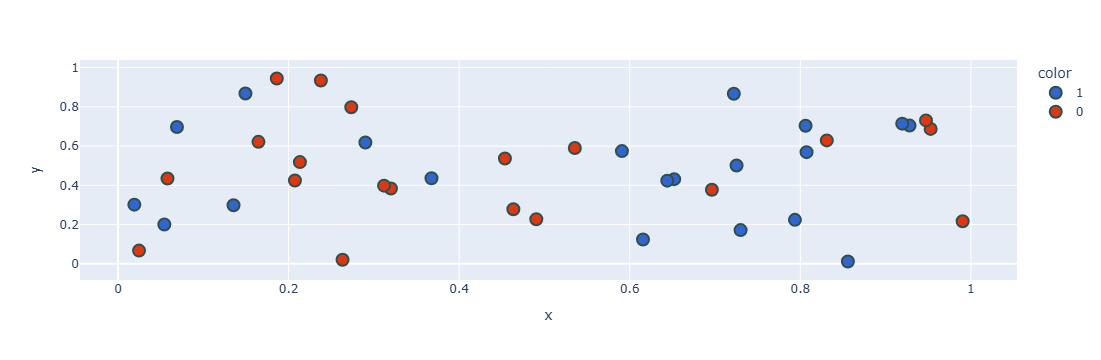

In [24]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     